In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest

In [19]:
df=pd.read_csv('adult_with_headers.csv')

In [20]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [24]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [25]:
df.shape

(32561, 15)

In [26]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


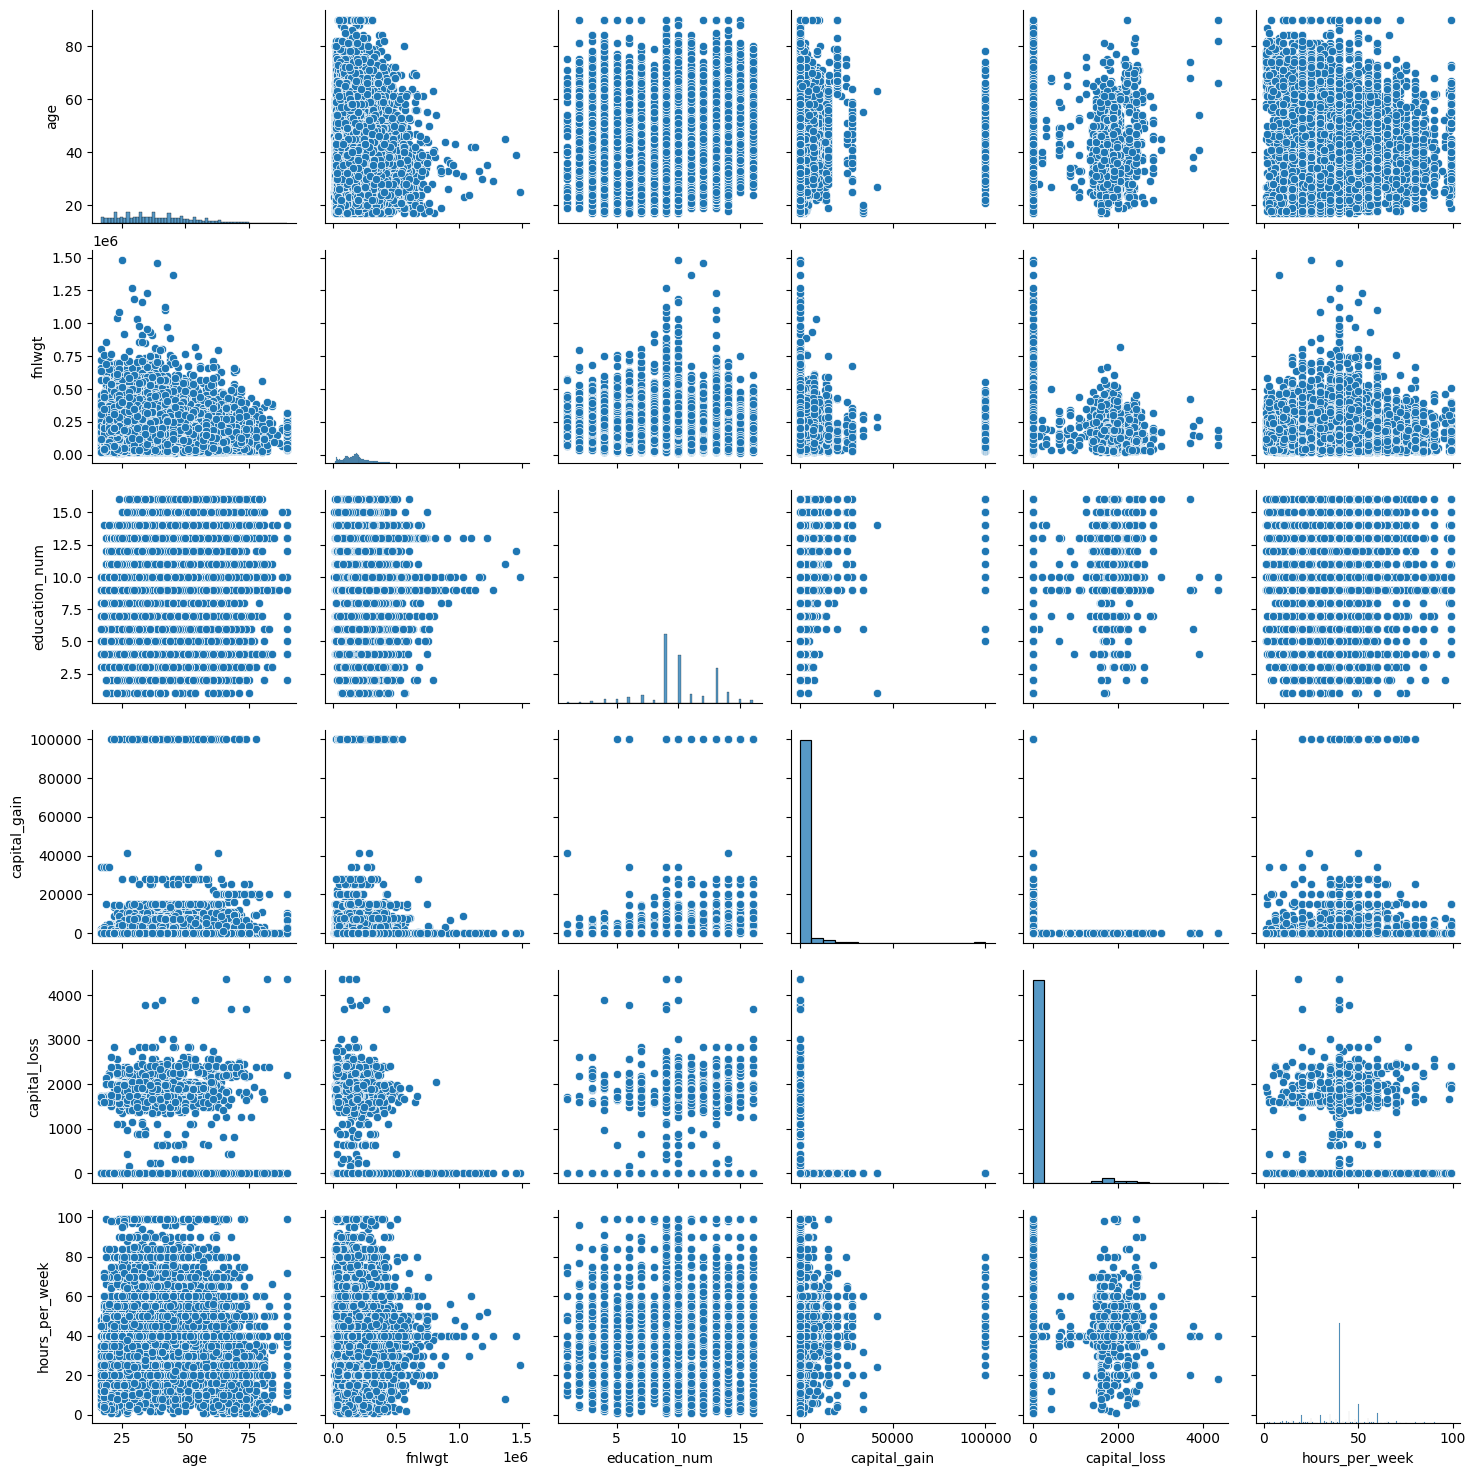

In [27]:
sns.pairplot(df)

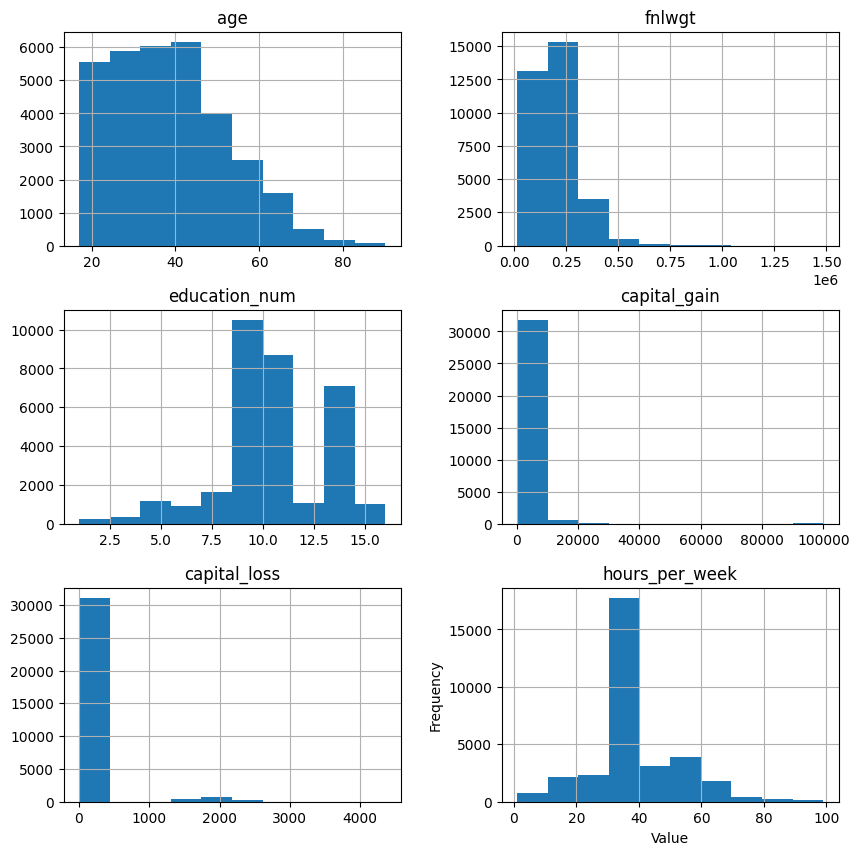

In [28]:
#Histogram of the data set
df.hist(figsize=(10,10))
plt.xlabel('Value')# Corrected from xlable to xlabel
plt.ylabel('Frequency')
plt.show()

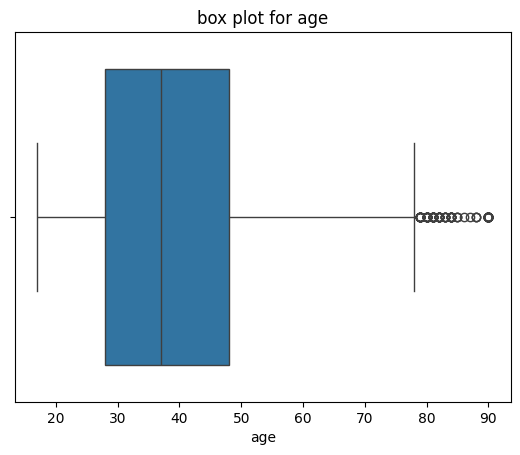

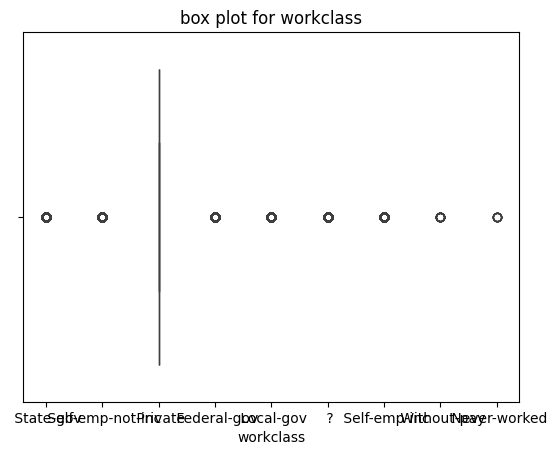

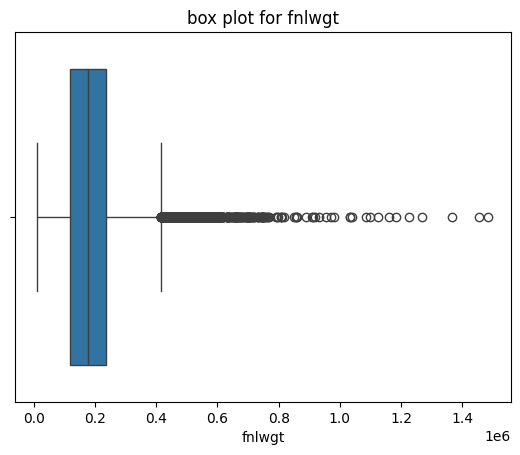

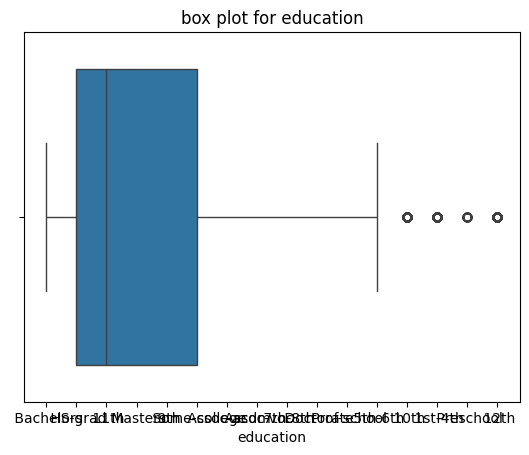

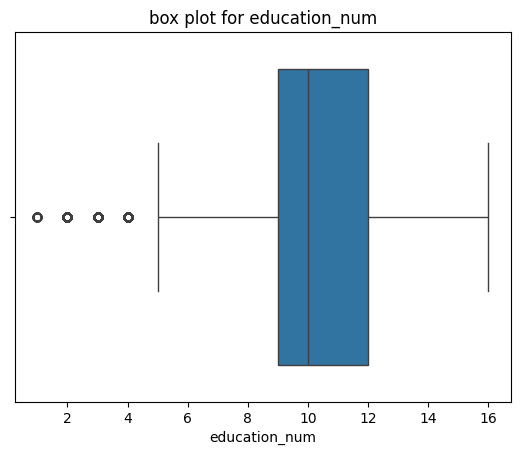

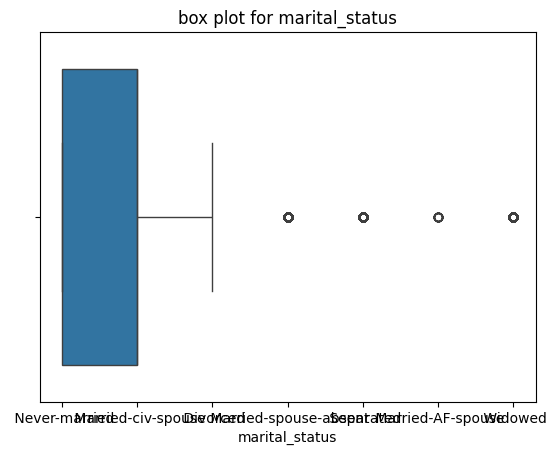

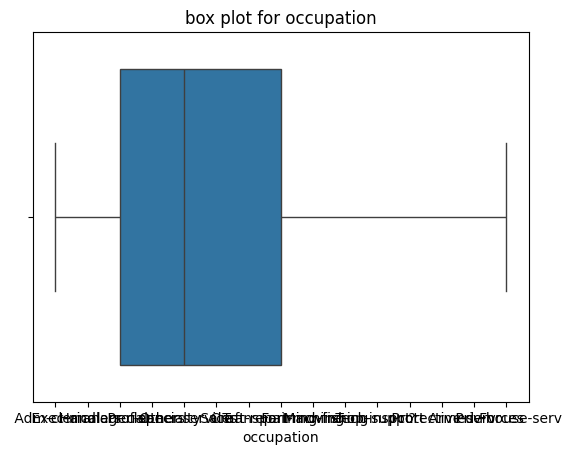

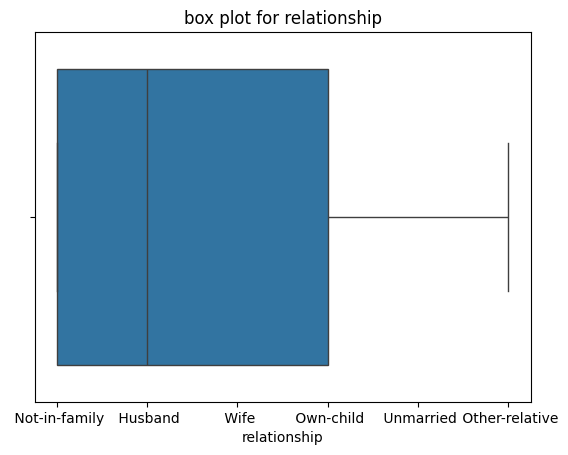

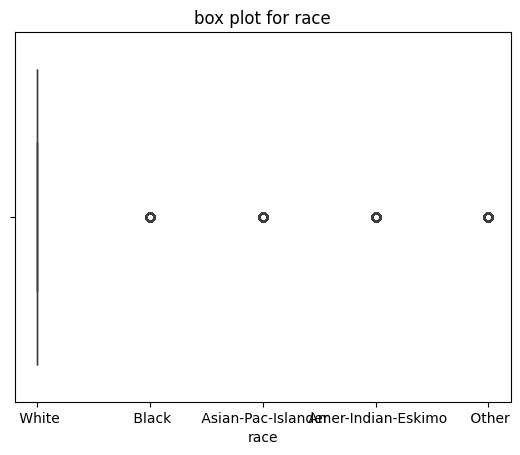

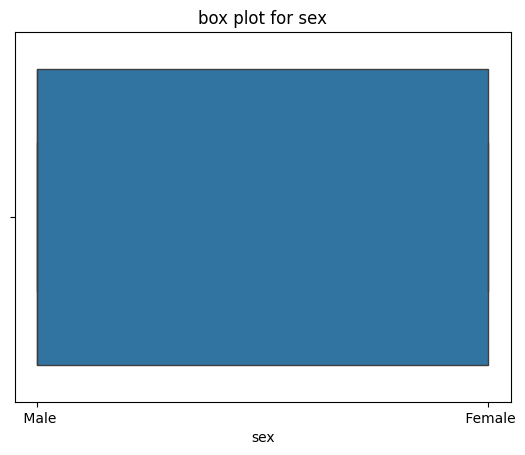

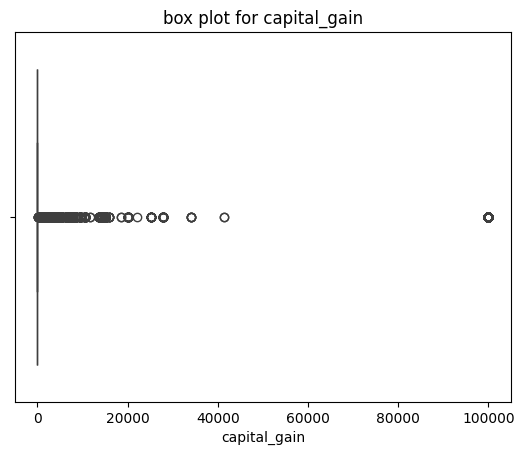

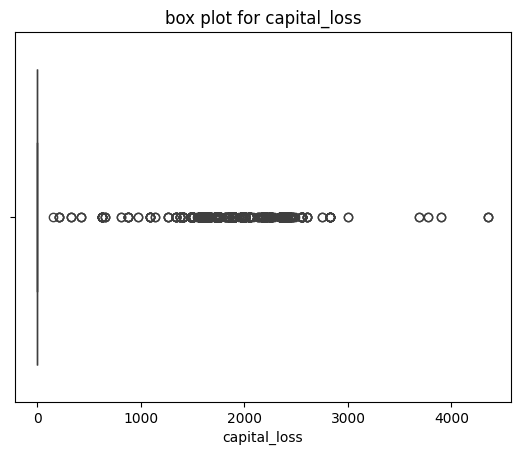

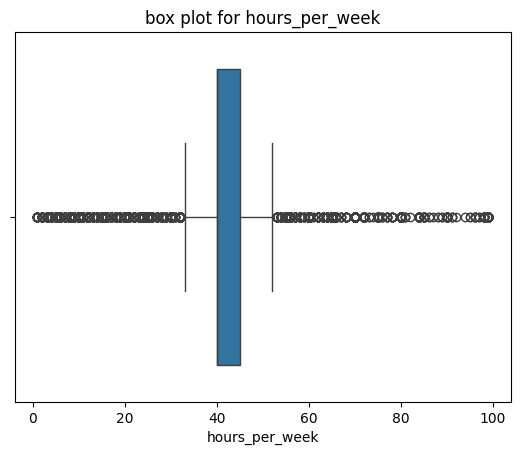

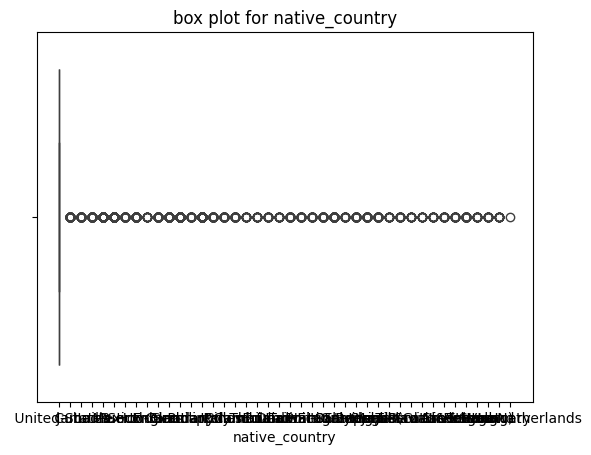

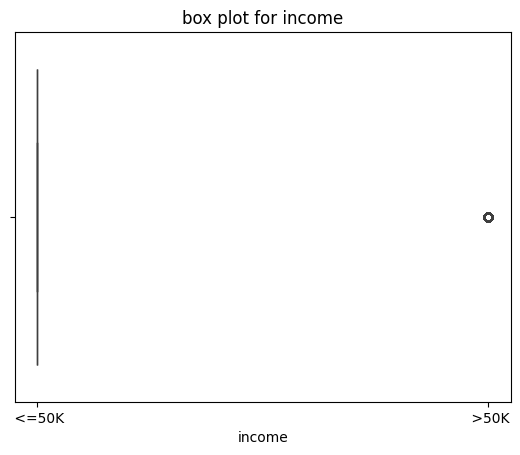

In [29]:
#boxpolt of the data set
for i in df.columns:
    plt.figure( figure=(5,5))
    sns.boxplot(x=df[i])
    plt.title(f'box plot for {i}')
    plt.show()


In [31]:
#	Handle missing values as per the best practices (imputation, removal, etc.).
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [36]:


#   Apply scaling techniques to numerical features:
#   Standard Scaling
#Min-Max Scaling

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical) #Scale only numerical data

# Create a new DataFrame with scaled numerical features
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features, index=df.index)

# Concatenate scaled numerical features with original categorical features
df_final = pd.concat([df.drop(columns=numerical_features), df_scaled], axis=1)

print("Scaled DataFrame:\n", df_final)


Scaled DataFrame:
                workclass    education       marital_status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  native_country  \
0            Adm-clerical   Not-in-family   White     Male   United-States   
1         Exec-managerial         Husband   White     Male   United-States   
2 

In [37]:
# prompt: •	Use Label Encoding for categorical variables with more than 5 categories.

# ... (Your existing code)

# Identify categorical columns with more than 5 unique values
categorical_cols = df.select_dtypes(include=['object']).columns
cols_to_label_encode = [col for col in categorical_cols if df[col].nunique() >= 5]

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in cols_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13              39   <=50

In [41]:
df['Education_Occupation'] = df['education'].astype(str) + '_' + df['occupation'].astype(str)
# Optionally, you can use Label Encoding to convert this new categorical feature into numerical form
#from sklearn.preprocessing import LabelEncoder #Fixed: Removed unnecessary import as it is already imported
#label_encoder = LabelEncoder() #Fixed: Removed unnecessary initialization as it is already initialized
df['Education_Occupation'] = label_encoder.fit_transform(df['Education_Occupation'])


In [45]:


# ... (Your existing code) ...

# Check if necessary columns exist for feature creation (case-insensitive)
required_cols = ['capital-gain', 'capital-loss', 'age', 'education-num', 'hours-per-week']
if all(col.lower() in [c.lower() for c in df.columns] for col in required_cols):

    # Feature 1: Capital Gain/Loss Ratio
    df['Capital_Gain_Loss_Ratio'] = df['capital-gain'] / (df['capital-loss'] + 1e-6)
    # Rationale: This feature captures the relative profitability of investments. A higher ratio indicates better investment performance.

    # Feature 2: Age-Education Interaction
    df['Age_Education_Interaction'] = df['age'] * df['education-num']
    # Rationale: This feature captures the combined effect of age and education level, which might influence income.

    # Feature 3: Weekly Wage
    # Assuming 'hours-per-week' represents weekly work hours
    # and you have a column like 'hourly_wage' or 'annual_salary'
    # (you'll need to adjust the column name if it's different)
    # Create a new 'weekly_wage' feature
    if 'hourly_wage' in df.columns:
        df['weekly_wage'] = df['hourly_wage'] * df['hours-per-week']
    elif 'annual_salary' in df.columns:
        df['weekly_wage'] = df['annual_salary'] / 52  # Assuming 52 weeks in a year
    # Rationale: Weekly wage provides a direct measure of income or earning potential.

print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race      sex  capital_gain  capital_loss  \
0           1             1     4     Male          2174             0   
1           4             0     4     Male             0             0   
2           6             1     4     Male             0             0   
3           6             0     2     Male             0             0   
4          10             5     2   Female             0             0   

   hours_per_week  native_country  income  Education_Occupation  
0              40              39   <=50K                   20

In [55]:
from sklearn.ensemble import IsolationForest

# Create an IsolationForest model
iso_forest = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination if needed

# Fit the model and predict outliers
df['outlier'] = iso_forest.fit_predict(df.select_dtypes(include=['number']))

# Remove outliers
df = df[df['outlier'] == 1]
df = df.drop(columns=['outlier'])  # Remove the outlier column

In [56]:
!pip install ppscore==1.3.0 # Install the ppscore library

import ppscore as pps

# Calculate PPS matrix
pps_matrix = pps.matrix(df)

# Display the matrix
print(pps_matrix)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 48.6 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=8f094aa2c15c42009a44255e654b2a074dfd64fe0c2238f85647624b285e82f4
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which i

                        x                     y   ppscore            case  \
0                     age                   age  1.000000  predict_itself   
1                     age             workclass  0.000000      regression   
2                     age                fnlwgt  0.000000      regression   
3                     age             education  0.000000      regression   
4                     age         education_num  0.000000      regression   
..                    ...                   ...       ...             ...   
251  Education_Occupation          capital_loss  0.000000      regression   
252  Education_Occupation        hours_per_week  0.000000      regression   
253  Education_Occupation        native_country  0.000000      regression   
254  Education_Occupation                income  0.270721  classification   
255  Education_Occupation  Education_Occupation  1.000000  predict_itself   

     is_valid_score               metric  baseline_score   model_score  \
0